# Projeto WPT Eletromagnetismo - 2023.1 - Prof. Fabio Hage
#### Luca Mizrahi, Enricco Gemha, Gustavo Oliveira

In [233]:
#Imports para o projeto
import numpy as np
from cmath import *
from numpy import linalg
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

## Fun√ß√µes do projeto WPT (Wireless Power Transfer)

In [234]:
# R1, R2, Rc => Resist√™ncias das bobinas prim√°rias e secund√°rias
# L1 = L2 = L => A indut√¢ncia das bobinas √© igual
# M = L, pois M = sqrt(L^2)
# C1 = C2 = C => A capacit√¢ncia dos capacitores √© igual
# k => Coeficiente de acoplamento

#Fun√ß√£o para c√°lculo da corrente no prim√°rio e secund√°rio
def CalcularTransformador_projeto(Uf, R1, R2, Rc, L, C, k, f):
    w = 2*pi*f
    XL = 1j*w*L
    XC = 1/(1j*w*C)
    M = k*L
    XM = 1j*w*M
    Z=np.array([[R1+XL+XC, -XM],[-XM, XL+R2+((Rc*XC)/(Rc+XC))]])
    V=np.array([Uf,0])
    i=np.dot(linalg.inv(Z),V)
    return i[0], i[1]

#Fun√ß√£o para c√°lculo da frequ√™ncia de resson√¢ncia
def CalculaFrequenciaRessonancia(L, C):
    return 1/(2*pi*sqrt(L*C))

#Fun√ß√£o para c√°lculo da pot√™ncia real
def Calcula_Potencia(V, i):
    return V/sqrt(2)*i.conjugate()/sqrt(2)

#Fun√ß√£o para c√°lculo da efici√™ncia
def calcula_eficiencia(S1,S2):
    return S2.real/S1.real

1. Elaborando diagrama do modelo eletronico do circuito WPT
<br/>https://www.circuitlab.com/circuit/rq64kt2p5cmu/projeto-eletromag/


3. Constru√ß√£o de gr√°ficos de $\hat I_1$ e $\hat I_2$ em fun√ß√£o da frequ√™ncia

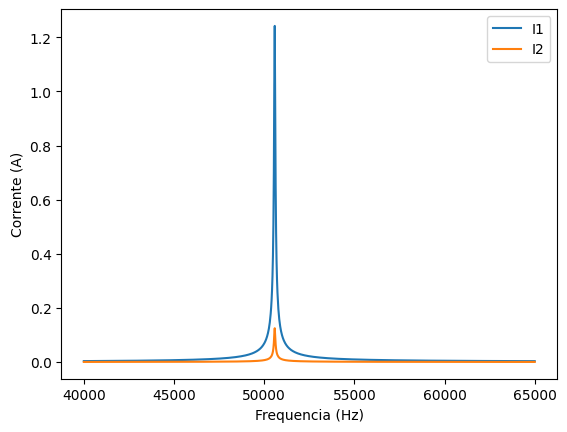

50585.585585585584
Frequencia de ressonancia:  (50329.21210448704+0j)


In [252]:
lista_freq = np.linspace(40000, 65e3, 1000)
maior_valor = 0
lista_i1 = []
lista_i2 = []
for freq in lista_freq:
    I1, I2 = CalcularTransformador_projeto(5, 1, 1, 300, 10e-3, 1e-9, 0.1, freq)
    lista_i1.append(abs(I1))
    lista_i2.append(abs(I2))

# plotar duas curvas no mesmo grafico de i1 e i2 por freq
plt.plot(lista_freq, lista_i1, label="I1")
plt.plot(lista_freq, lista_i2, label="I2")
plt.xlabel("Frequencia (Hz)")
plt.ylabel("Corrente (A)")

plt.legend()
plt.show()
print(lista_freq[lista_i1.index(max(lista_i1))])
# Calculo da frequencia de ressonancia
freq_r = 1/(2*pi*sqrt(10e-3*1e-9))
print("Frequencia de ressonancia: ", freq_r)

4. Constru√ß√£o de um gr√°fico do m√≥dulo da tens√£o $V_2$ pela frequ√™ncia de resson√¢ncia, para 6 diferentes indut√¢ncias

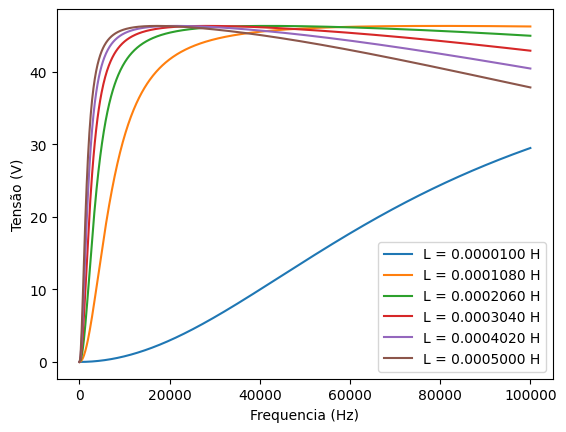

In [236]:
#Criando uma lista para as legendas do gr√°fico
lista_L = np.linspace(10e-6, 500e-6, 6)
lista_legendas = []
for l in lista_L:
    legenda = str("L = {:.7f} H".format(l))
    lista_legendas.append(legenda)

Rc = 400
lista_freq_r = np.linspace(1, 100000, 1000)
lista_V2 = []

for l in lista_L:
    lista_V2_individual = []
    for freq in lista_freq_r:
        # C√°lculo da capacit√¢ncia
        C = 1/((freq**2)*(4*pi**2)*l)
        I1, I2 = CalcularTransformador_projeto(10, 1, 1, Rc, l, C, 0.2, freq)
        #C√°lculo da tens√£o no secund√°rio
        XC = 1/(1j*freq*2*pi*C)
        V2 = I2*((Rc*XC)/(Rc+XC))
        lista_V2_individual.append(abs(V2))
    lista_V2.append(lista_V2_individual)

# Plot de V2 por freq para cada valor de L
lista_L = list(lista_L)
i = 0
for lista_V2_individual in lista_V2:
    # lista_freq_r = lista_freq_r[]
    # lista_V2_individual = lista_V2_individual[]
    plt.plot(lista_freq_r, lista_V2_individual, label=lista_legendas[i])
    i += 1
plt.xlabel("Frequencia (Hz)")
plt.ylabel("Tens√£o (V)")
#plt.xlim(1, 20000)
plt.legend()
plt.show()


5. Constru√ß√£o de gr√°ficos das pot√™ncias e da efici√™ncia em fun√ß√£o da frequ√™ncia

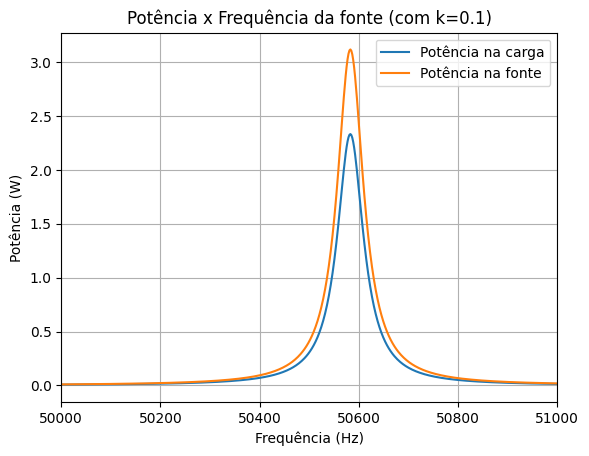

Pot√™ncia m√°xima para k=0.1:  2.332006410023215


In [254]:
lista_iRC = []
lista_eficiencia = []
lista_potencia_carga = []
lista_potencia_fonte = []

L = 10e-3
C = 1e-9
Rc = 300
Uf = rect(5, 0)

lista_freq = np.linspace(10e3, 200e3, 100500)

#Calculando pot√™ncia e efici√™ncia em fun√ß√£o da frequ√™ncia.
for f in lista_freq:
    i1, i2 = CalcularTransformador_projeto(Uf, 1, 1, Rc, L, C, 0.1, f)
    w = 2*pi*f
    Pot = (Calcula_Potencia(Uf, i1)).real
    lista_potencia_fonte.append(Pot)

    Z_eq_carga = ((1/(1j*w*C))*Rc)/((1/(1j*w*C))+Rc)
    V_carga = i2*Z_eq_carga
    I_Rc = V_carga/Rc
    Pot_carga = (Calcula_Potencia(V_carga, I_Rc)).real

    #Adiciona os resultados na lista
    lista_potencia_carga.append(Pot_carga)
    lista_eficiencia.append(calcula_eficiencia(Pot, Pot_carga))

#Plotando a efici√™ncia em fun√ß√£o da frequ√™ncia
plt.plot(lista_freq, lista_potencia_carga, label="Pot√™ncia na carga")
plt.plot(lista_freq, lista_potencia_fonte, label="Pot√™ncia na fonte")
plt.title("Pot√™ncia x Frequ√™ncia da fonte (com k=0.1)")
plt.xlabel("Frequ√™ncia (Hz)")
plt.ylabel("Pot√™ncia (W)")
#plt.ylim(0, 50)
plt.xlim(50000, 51000)
plt.legend()
plt.grid(True)
plt.show()

# C√°lculo da pot√™ncia m√°xima para o k=0.1
print("Pot√™ncia m√°xima para k=0.1: ", float(max(lista_potencia_carga)))


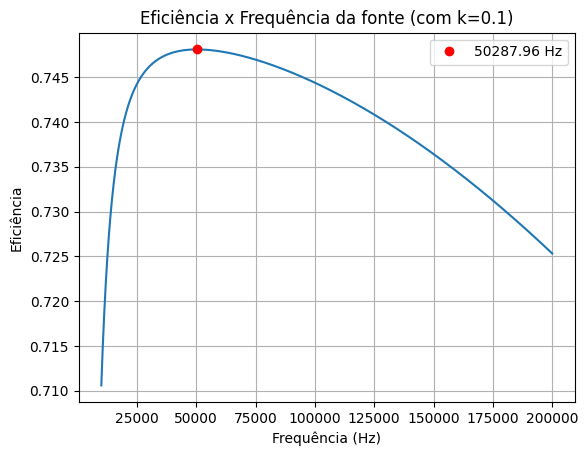

In [238]:
# Utilizando a lista de efici√™ncia do item anterior
plt.plot(lista_freq, lista_eficiencia)
i = lista_eficiencia.index(max(lista_eficiencia))
plt.plot(lista_freq[i], lista_eficiencia[i], 'ro', label=f'{round(lista_freq[i], 2)} Hz')
plt.title("Efici√™ncia x Frequ√™ncia da fonte (com k=0.1)")
plt.xlabel("Frequ√™ncia (Hz)")
plt.ylabel("Efici√™ncia")
plt.legend()
plt.grid(True)
plt.show()

6. Constru√ß√£o de um gr√°fico que relacione o valor de pico da tens√£o no secund√°rio (no resistor $ùëÖ_ùê∂$) com o coeficiente de acoplamento $k$

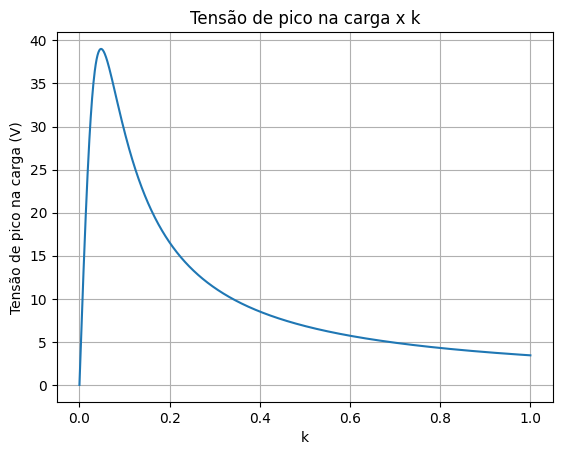

In [248]:
L = 100e-6
C = 1e-9
Rc = 300
Uf = rect(5, 0)
freq_r = 1/(2*pi*sqrt(L*C))

lista_k = np.linspace(0, 1, 1000)
lista_tensao_pico = []
for k_novo in lista_k:
    i1, i2 = CalcularTransformador_projeto(Uf, 1, 1, Rc, L, C, k_novo, freq_r)
    w = 2*pi*freq_r
    Z_eq_carga = ((1/(1j*w*C))*Rc)/((1/(1j*w*C))+Rc)
    V_carga = i2*Z_eq_carga
    lista_tensao_pico.append(abs(V_carga))

plt.plot(lista_k, lista_tensao_pico)
plt.title("Tens√£o de pico na carga x k")
plt.xlabel("k")
plt.ylabel("Tens√£o de pico na carga (V)")
plt.grid(True)
plt.show()
    
